In [515]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csvA")
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# EDA

In [4]:
corr_matrix = data.corr()
corr_matrix

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

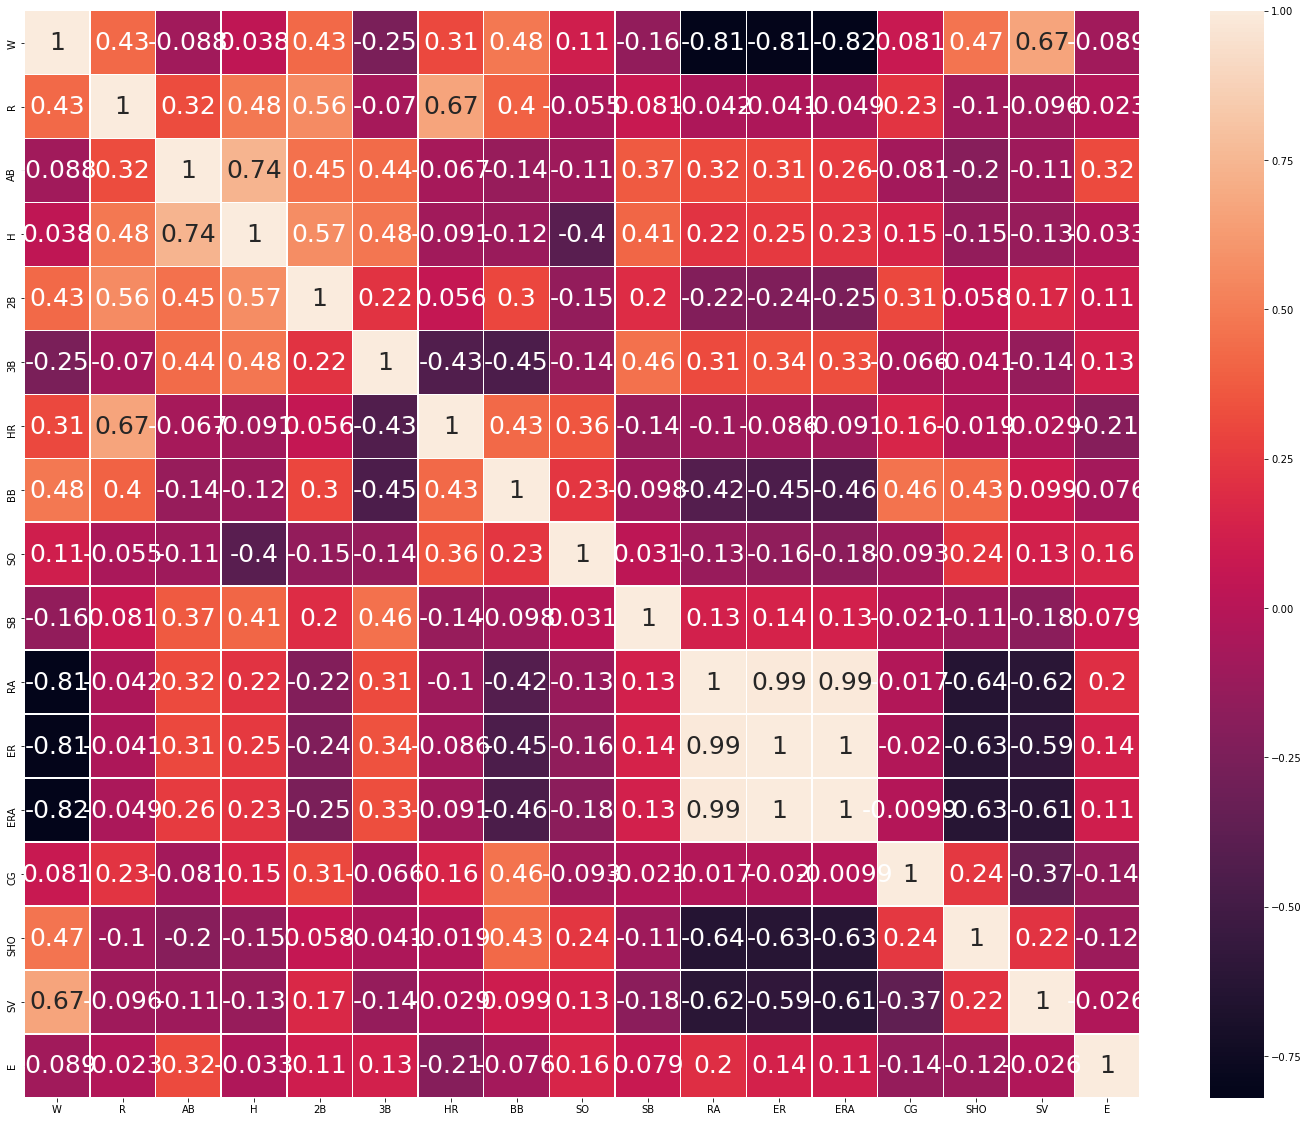

In [8]:
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 25})

In [75]:
df = data[["R","2B","3B","HR","BB","SO","SB","CG","SHO","SV","E","W"]]
df

,R,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E,W
0,724,300,42,139,383,973,104,2,8,56,88,95
1,696,277,44,156,439,1264,70,2,12,45,86,83
2,669,303,29,141,533,1157,86,11,10,38,79,81
3,622,260,27,136,404,1231,68,7,9,37,101,76
4,689,289,49,151,455,1259,83,7,12,35,86,74
5,891,308,17,232,570,1151,88,7,10,34,88,93
6,764,272,19,212,554,1227,63,3,4,48,93,87
7,713,246,20,217,418,1331,44,0,10,43,77,81
8,644,278,32,167,436,1310,87,1,12,60,95,80
9,748,294,33,161,478,1148,71,3,10,40,97,78


/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


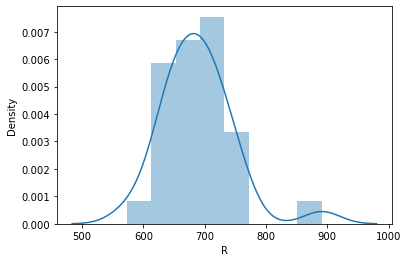

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


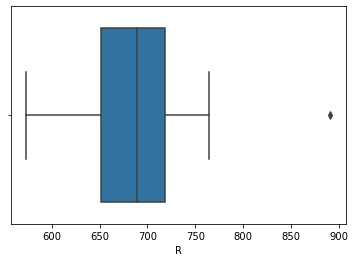

In [33]:
sns.distplot(df["R"])
plt.show()
sns.boxplot(df["R"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


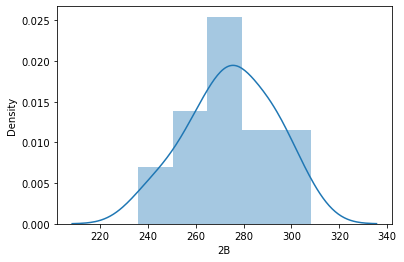

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


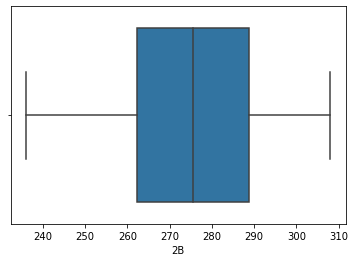

In [38]:
sns.distplot(df["2B"])
plt.show()
sns.boxplot(df["2B"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


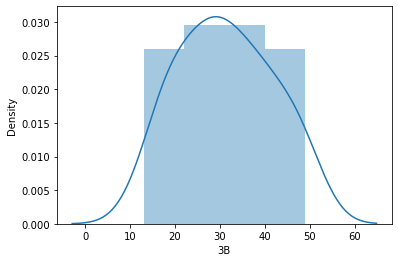

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


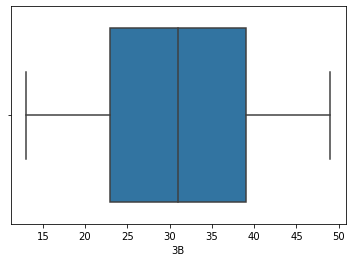

In [39]:
sns.distplot(df["3B"])
plt.show()
sns.boxplot(df["3B"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


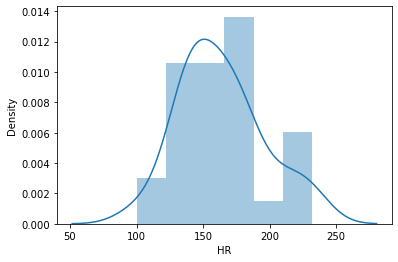

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


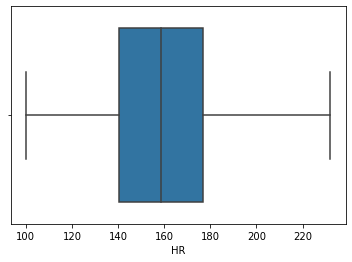

In [40]:
sns.distplot(df["HR"])
plt.show()
sns.boxplot(df["HR"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


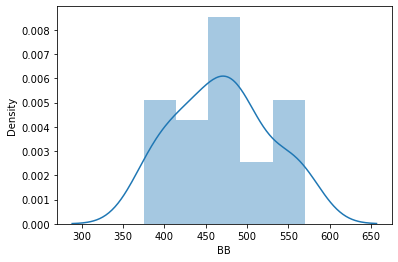

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


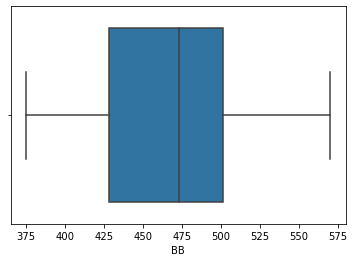

In [41]:
sns.distplot(df["BB"])
plt.show()
sns.boxplot(df["BB"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


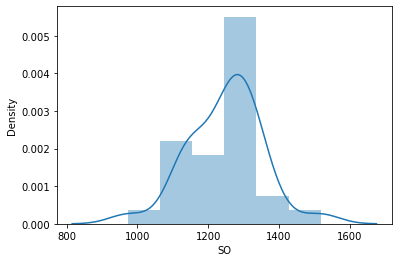

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


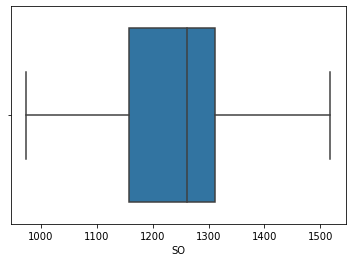

In [42]:
sns.distplot(df["SO"])
plt.show()
sns.boxplot(df["SO"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


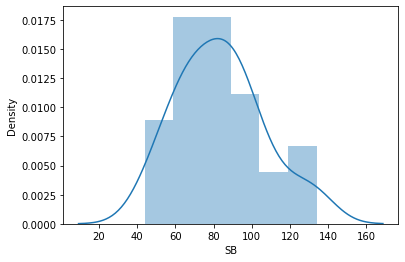

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


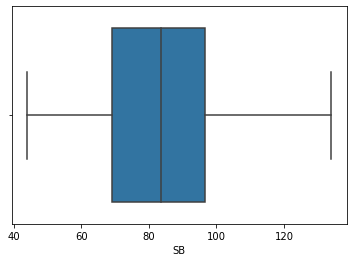

In [43]:
sns.distplot(df["SB"])
plt.show()
sns.boxplot(df["SB"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


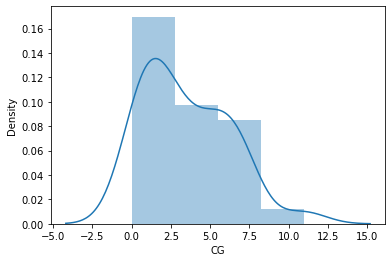

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


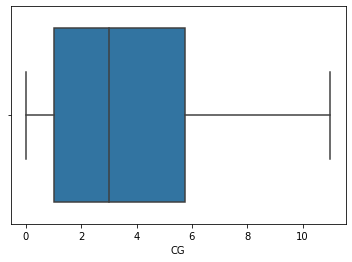

In [46]:
sns.distplot(df["CG"])
plt.show()
sns.boxplot(df["CG"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


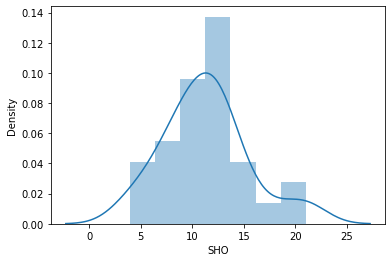

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


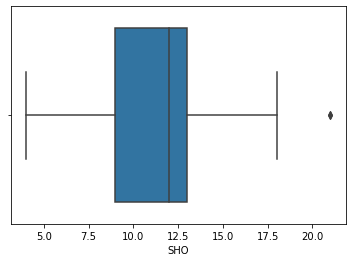

In [45]:
sns.distplot(df["SHO"])
plt.show()
sns.boxplot(df["SHO"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SV', ylabel='Density'>

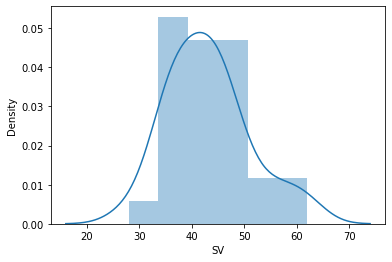

In [24]:
sns.distplot(df["SV"])

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


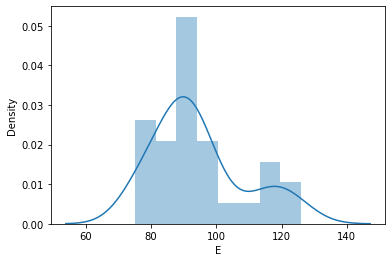

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


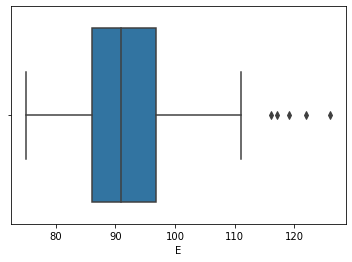

In [44]:
sns.distplot(df["E"])
plt.show()
sns.boxplot(df["E"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='W', ylabel='Density'>

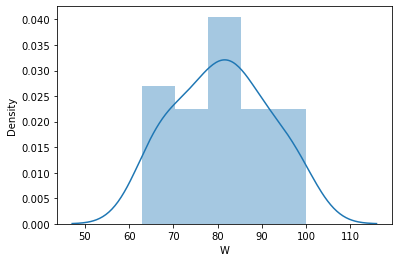

In [27]:
sns.distplot(df["W"])

## Bivariate Analysis

In [48]:
"R","2B","3B","HR","BB","SO","SB","CG","SHO","SV","E"

('R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO', 'SV', 'E')

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


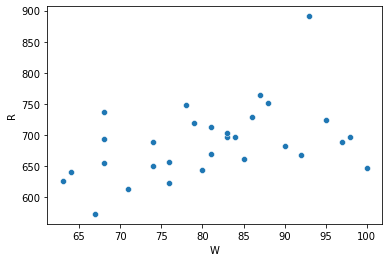

In [49]:
sns.scatterplot(df["W"],df["R"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


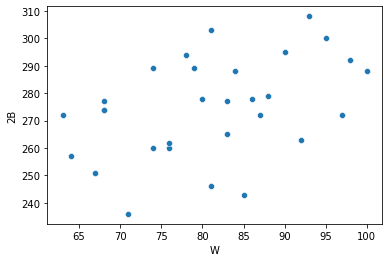

In [52]:
sns.scatterplot(df["W"],df["2B"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


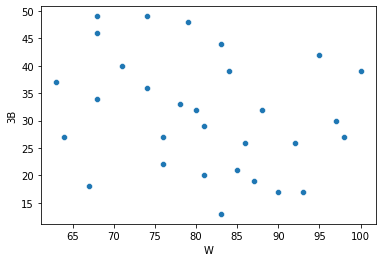

In [53]:
sns.scatterplot(df["W"],df["3B"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


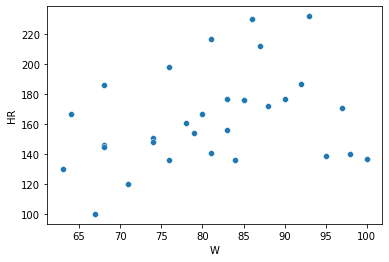

In [54]:
sns.scatterplot(df["W"],df["HR"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


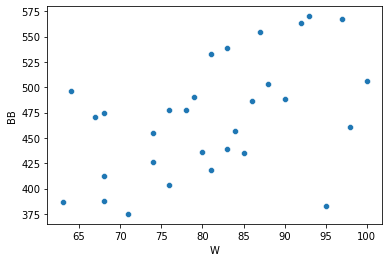

In [55]:
sns.scatterplot(df["W"],df["BB"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


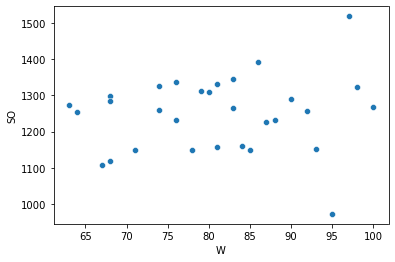

In [56]:
sns.scatterplot(df["W"],df["SO"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


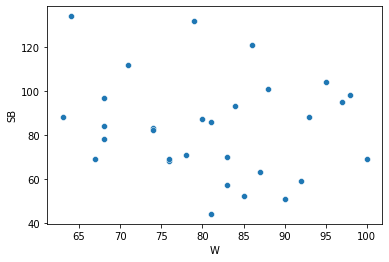

In [57]:
sns.scatterplot(df["W"],df["SB"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


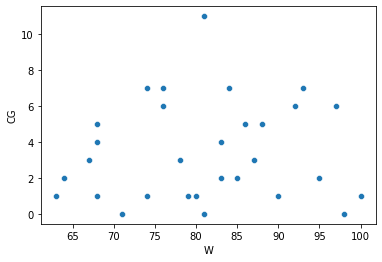

In [58]:
sns.scatterplot(df["W"],df["CG"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


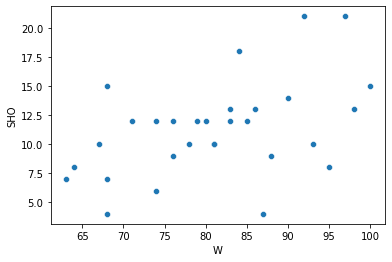

In [59]:
sns.scatterplot(df["W"],df["SHO"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


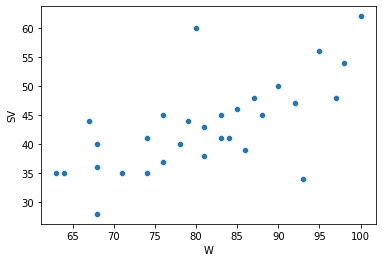

In [60]:
sns.scatterplot(df["W"],df["SV"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


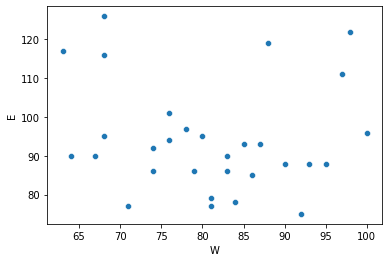

In [61]:
sns.scatterplot(df["W"],df["E"])
plt.show()

## Multivariate Analysis 

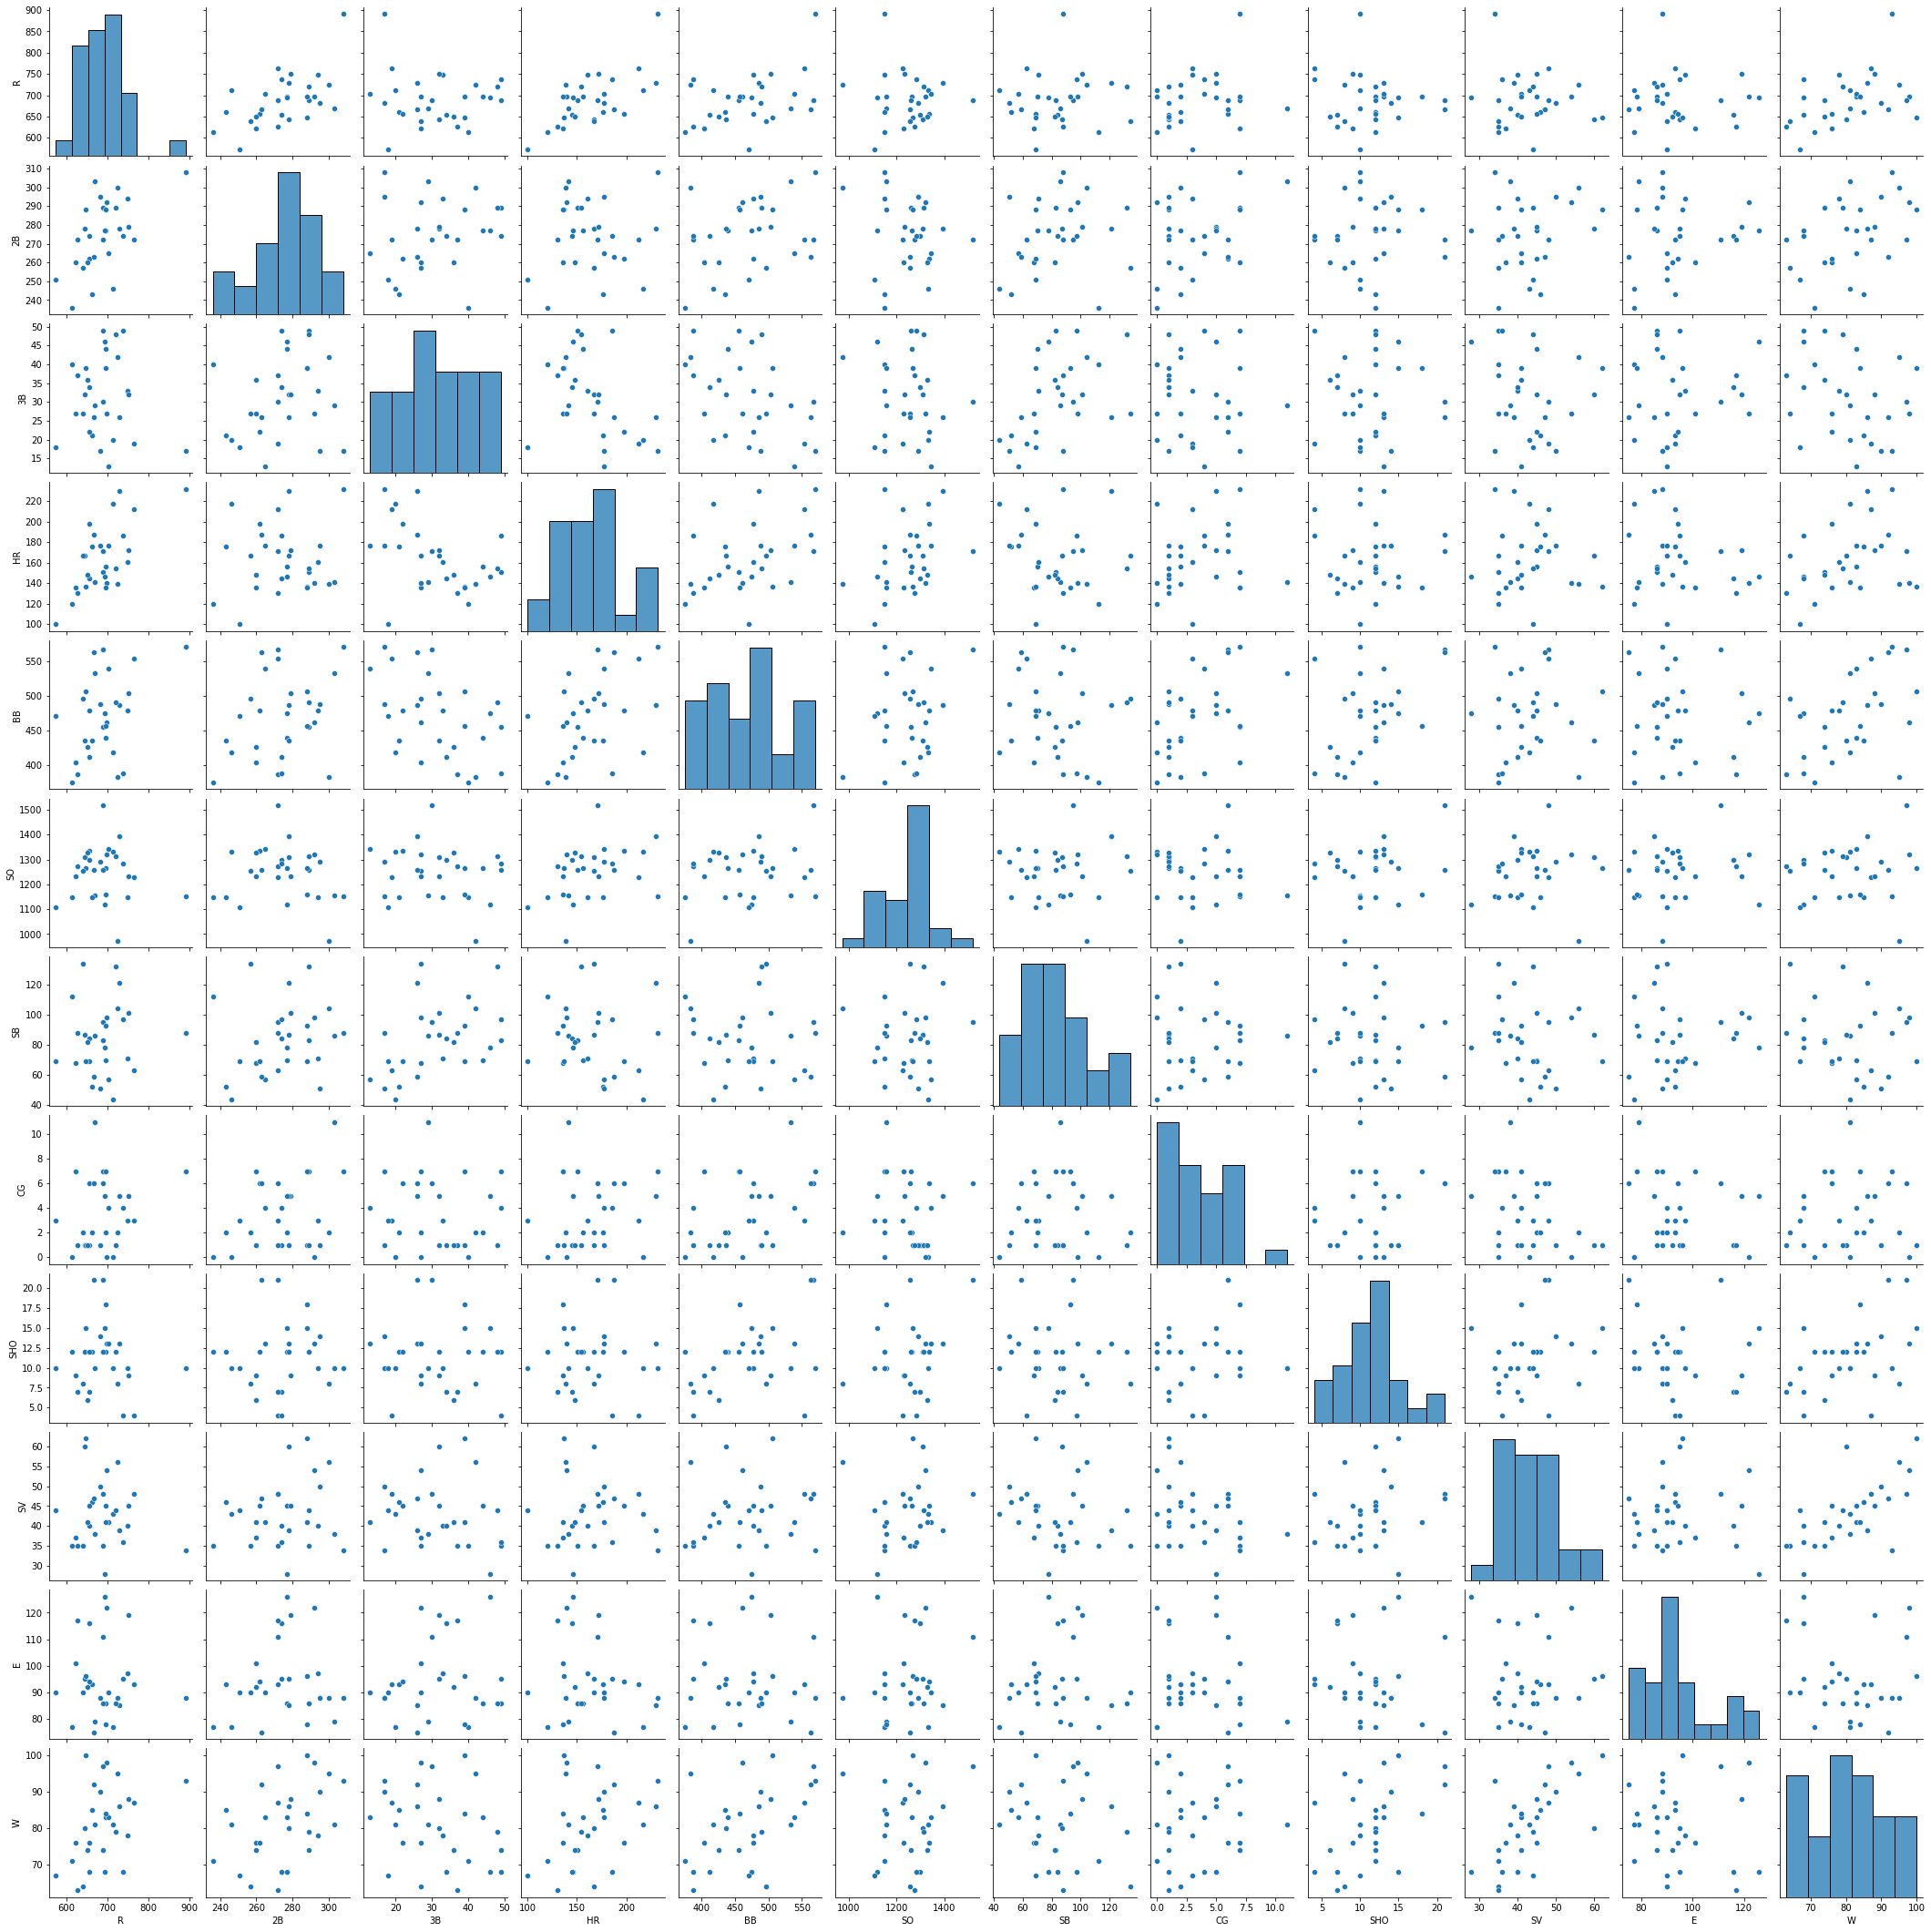

In [76]:
sns.pairplot(df)

In [531]:
Y = df["W"]
Y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [532]:
X = df.drop("W",axis=1)
X

,R,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,300,42,139,383,973,104,2,8,56,88
1,696,277,44,156,439,1264,70,2,12,45,86
2,669,303,29,141,533,1157,86,11,10,38,79
3,622,260,27,136,404,1231,68,7,9,37,101
4,689,289,49,151,455,1259,83,7,12,35,86
5,891,308,17,232,570,1151,88,7,10,34,88
6,764,272,19,212,554,1227,63,3,4,48,93
7,713,246,20,217,418,1331,44,0,10,43,77
8,644,278,32,167,436,1310,87,1,12,60,95
9,748,294,33,161,478,1148,71,3,10,40,97


In [533]:
scaler = StandardScaler()

In [534]:
X = scaler.fit_transform(X)
X

array([[ 0.61907797,  1.42017307,  1.04119304, -0.7872986 , -1.53490242,
        -2.69762957,  0.91388329, -0.5398062 , -0.81462859,  1.67160651,
        -0.46146963],
       [ 0.13443166,  0.12740339,  1.23580856, -0.24396668, -0.5365919 ,
         0.15487844, -0.60182558, -0.5398062 ,  0.1728    ,  0.24987932,
        -0.60719689],
       [-0.33290586,  1.58879521, -0.22380785, -0.7233772 ,  1.13914361,
        -0.89398189,  0.11144918,  2.77264091, -0.32091429, -0.65485616,
        -1.11724227],
       [-1.14641931, -0.82812203, -0.41842337, -0.8831807 , -1.16053598,
        -0.16860185, -0.69098493,  1.3004422 , -0.56777144, -0.78410408,
         0.48575751],
       [ 0.01327008,  0.80189192,  1.72234737, -0.40377019, -0.25136033,
         0.10586628, -0.02228984,  1.3004422 ,  0.1728    , -1.04259994,
        -0.60719689],
       [ 3.50964704,  1.86983209, -1.39150098,  2.18504658,  1.79874163,
        -0.95279649,  0.20060853,  1.3004422 , -0.32091429, -1.17184786,
        -0.461

In [535]:
pca = PCA()

In [536]:
pca.fit_transform(X)

array([[-1.66912441e+00, -2.05736821e+00,  2.40310223e-01,
        -3.46052286e-01,  3.11493221e+00, -7.57307770e-01,
         3.48876666e-01, -1.83022616e-01,  9.26152450e-01,
        -2.21144500e-01, -1.35266541e-02],
       [-6.44215690e-01, -6.91092116e-02,  3.08272785e-01,
        -8.02709096e-02,  4.75070283e-01, -7.11625800e-01,
        -1.22544924e+00,  7.04131211e-02, -4.11063020e-01,
         3.22295952e-01, -1.20982332e-01],
       [ 1.31841351e+00, -1.69518364e+00,  1.22305056e-01,
         2.53756470e+00,  4.49522312e-01,  3.98453095e-01,
         8.17836676e-01,  1.62054384e+00, -2.07408015e-01,
        -2.67409395e-02,  1.40292067e-01],
       [-1.26290916e+00,  4.28599457e-01, -8.16323821e-01,
         1.33173062e+00, -5.97619022e-01,  1.25855773e+00,
        -1.67452444e-01,  9.16097506e-01,  6.27443657e-01,
        -4.10478098e-01, -2.88231028e-01],
       [-1.67993077e-01, -1.67088945e+00,  3.00007704e-01,
         1.22986923e+00, -5.46136338e-01, -3.62281875e-01,
  

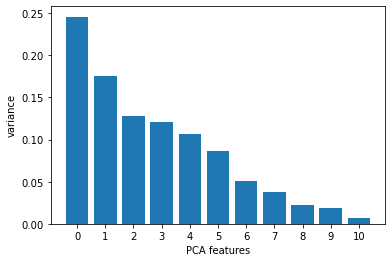

In [537]:
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [538]:
pca.explained_variance_ratio_

array([0.24585919, 0.17520432, 0.12828079, 0.12112456, 0.10632185,
       0.0860017 , 0.05108302, 0.03823124, 0.02212813, 0.01905006,
       0.00671514])

In [539]:
ratio_sum = 0
count = 0
for i in pca.explained_variance_ratio_:
    ratio_sum += i
    count+=1
    if ratio_sum>0.7:
        break
print(count)

5


In [548]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [549]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [553]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 6,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [554]:
pca = PCA(n_components=6)

In [555]:
pca.fit(X_train)

PCA(n_components=6)

In [556]:
pca.explained_variance_

array([2.86351892, 2.01463758, 1.67209866, 1.44038013, 1.13349995,
       0.91474301])

In [557]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Linear Regression 

In [558]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [559]:
r2 = lr.score(X_test,y_test)
r2

0.7595776524766049

In [560]:
y_pred = lr.predict(X_test)
y_pred

array([82.69932372, 72.01237471, 80.79951124, 80.93614457, 84.59288482,
       66.67167597])

In [561]:
y_test

2     81
28    74
13    76
10    88
26    84
24    63
Name: W, dtype: int64

In [562]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

3.949777081665675

In [583]:
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=3)
scores

array([ 0.28633499,  0.50671491, -0.04306013])

In [584]:
print(np.mean(scores),np.std(scores))

0.2499965908087742 0.22591076133580168


### Lasso Regression 

In [586]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [587]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.7055329182379244
test score:  0.6869673573511155
number of features used:  5


We do not use cross validation fir lasso regression

### Decision Tree Regression

In [599]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    DTR = DecisionTreeRegressor(max_depth=2)
    DTR.fit(X_train, y_train)
    r2 = DTR.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.7169451320132012


42

In [601]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=42)

In [602]:
DTR = DecisionTreeRegressor(max_depth=2)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [603]:
y_pred = DTR.predict(X_test)
y_pred

array([83.25      , 96.5       , 72.25      , 89.66666667, 89.66666667,
       83.25      , 72.25      , 72.25      , 89.66666667])

In [604]:
r2 = DTR.score(X_test,y_test)
r2

0.7169451320132012

In [605]:
y_test

27     79
15    100
23     67
17     97
8      80
9      78
28     74
24     63
12     85
Name: W, dtype: int64

In [606]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

6.173982147330487

### Support Vector Regression 

In [607]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    svr = SVR()
    svr.fit(X_train, y_train)
    r2 = svr.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.1461956520182739


93

In [608]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=index)

In [609]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [610]:
y_pred = svr.predict(X_test)
y_pred

array([79.64794655, 80.84223668, 79.53354162, 79.7765341 , 80.65168817,
       81.66814593, 81.28033372, 81.02546332, 80.38481436])

In [611]:
r2 = svr.score(X_test,y_test)
r2

0.1461956520182739

In [612]:
y_test

18    68
11    86
28    74
3     76
12    85
20    90
6     87
2     81
22    71
Name: W, dtype: int64

In [613]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

6.800956249887702

### Random Forest Regressor

In [483]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [484]:
y_pred = rfr.predict(X_test)
y_pred

array([75.3 , 81.22, 74.3 , 69.91, 81.03, 89.66, 88.53, 83.75, 68.54])

In [485]:
r2 = rfr.score(X_test,y_test)
r2

0.7022944393801277

In [547]:
y_test

2     81
28    74
13    76
10    88
26    84
24    63
Name: W, dtype: int64

In [614]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

6.800956249887702

In [615]:
scores = cross_val_score(rfr, X_train, y_train, scoring='r2',cv=4)
scores

array([0.06222132, 0.25878265, 0.42633662, 0.34472804])

In [616]:
print(np.mean(scores),np.std(scores))

0.2730171561320682 0.13535768751692104


From the above four algorithm we observe that linear regression gives the lowest difference between it's model score and cross validation score

We cannot tune hyperparameters for linear regression.

In [617]:
import pickle

In [619]:
outfile = open("baseball",'wb')

In [ ]:
pickle.dump(outfile)
outfile.close()